In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import os


# 1 - FUNCTION TO EVALUATE MODEL

In [147]:
def evaluate_model(input_dir, feature_set_name, features, output_csv=None):
    # Number of folds
    n_folds = 5

    # Initialize lists to store all predictions and true values across all folds
    all_y_true = []
    all_y_pred = []

    # Initialize list to store fold-wise metrics
    fold_metrics = []

    # Loop through each fold
    for fold in range(1, n_folds + 1):
        # Load training and test set
        train = pd.read_csv(os.path.join(input_dir, f'training_data_fold{fold}.csv'))
        test = pd.read_csv(os.path.join(input_dir, f'test_data_fold{fold}.csv'))
        
        # Convert to log years
        y_train = np.log1p(train['TSI_days'] / 365)
        y_test = np.log1p(test['TSI_days'] / 365)

        # Specified feature set
        X_train = train[features]
        X_test = test[features]

        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = model.predict(X_test)
        
        # Store the true values and predictions
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
        
        # Calculate and store metrics for the current fold
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Fold {fold}: MSE = {mse}, MAE = {mae}, R² = {r2}")
        
        fold_metrics.append({
            'Feature_Set': feature_set_name, 
            'Fold': fold,
            'MSE': mse,
            'MAE': mae,
            'R²': r2
        })

    # Convert lists to numpy arrays
    all_y_true = np.array(all_y_true)
    all_y_pred = np.array(all_y_pred)

    # Calculate overall performance metrics across all folds
    overall_mse = mean_squared_error(all_y_true, all_y_pred)
    overall_mae = mean_absolute_error(all_y_true, all_y_pred)
    overall_r2 = r2_score(all_y_true, all_y_pred)

    # Print the overall performance metrics
    print("\nOverall Performance across all folds:")

    print(f"Overall MSE: {overall_mse}")
    print(f"Overall MAE: {overall_mae}")
    print(f"Overall R²: {overall_r2}")
    
    # Add overall metrics to the DataFrame
    fold_metrics.append({
        'Feature_Set': feature_set_name, 
        'Fold': 'Overall',
        'MSE': overall_mse,
        'MAE': overall_mae,
        'R²': overall_r2
    })

    metrics_df = pd.DataFrame(fold_metrics)
    # Save to CSV if output_csv is provided
    if output_csv:
        metrics_df.to_csv(output_csv, index=False)
        print(f"Performance metrics saved to {output_csv}")

    return metrics_df


# FEATURE SETS (NO META)

In [148]:
# Feature set with smoothed features (excluding meta-features)
features_smoothed_no_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 
                                'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 
                                'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 
                                'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips',
                                'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips']

features_tanya = ['gag_lrtt', 'gp120_lrtt', 'pol_lrtt',
                  'gp41_tips', 'gag_tips', 'gp120_tips',
                  'gp41_maf12c',
                  'gag_maf3c', 'gp41_maf3c']

features_top10_corr_no_meta = ['genome_lrtt','gag_lrtt', 'pol_lrtt',
                               'gp120_lrtt', 'gp120_maf12c', 'genome_maf3c', 
                               'gp41_maf3c', 'gag_maf3c', 'genome_maf12c', 'gp120_ambig']

features_top10_fi_no_meta = ["genome_lrtt", "genome_maf12c",  "genome_ambig",
                             "gag_lrtt", "gag_maf3c", "gag_ambig",
                             "gp120_lrtt", "gp120_maf3c",
                             "pol_maf3c", "pol_ambig"]

features_top11_fi_no_meta = ["genome_lrtt", "genome_maf12c",  "genome_ambig",
                             "gag_lrtt", "gag_maf3c", "gag_ambig",
                             "gp120_lrtt", "gp120_maf3c",
                             "pol_maf3c", "pol_ambig",
                             "gp41_maf3c"]

features_top12_fi_no_meta = ["genome_lrtt", "genome_maf12c",  "genome_ambig",
                             "gag_lrtt", "gag_maf3c", "gag_ambig",
                             "gp120_lrtt", "gp120_maf3c", "gp120_ambig",
                             "pol_maf3c", "pol_ambig",
                             "gp41_maf3c"]


# IMPACT OF BSPLINE SMOOTHING

In [149]:
feature_sets = [
    # Unsmoothed and Smoothed Feature Set
    {'name': 'common_features', 'features': features_smoothed_no_meta, 'compatible_datasets': ['B-spline', 'P-spline', 'Unsmoothed']},
    {'name': 'tanya', 'features': features_tanya, 'compatible_datasets': ['B-spline', 'P-spline', 'Unsmoothed']},
    {'name': 'Top10_corr_no_meta', 'features': features_top10_corr_no_meta, 'compatible_datasets': ['B-spline', 'P-spline', 'Unsmoothed']},
    {'name': 'Top10_fi_no_meta', 'features': features_top10_fi_no_meta, 'compatible_datasets': ['B-spline', 'P-spline', 'Unsmoothed']}, 
    {'name': 'Top11_fi_no_meta', 'features': features_top11_fi_no_meta, 'compatible_datasets': ['B-spline', 'P-spline', 'Unsmoothed']}, 
    {'name': 'Top12_fi_no_meta', 'features': features_top12_fi_no_meta, 'compatible_datasets': ['B-spline', 'P-spline', 'Unsmoothed']}, 

]


# Directories for smoothed and unsmoothed data
datasets = {
    'B-spline': './data/derived/smoothed/bspline/',
    'P-spline': './data/derived/smoothed/pspline/',
    'Unsmoothed': './data/derived/unsmoothed/'
}

all_results = pd.DataFrame()

for feature_set in feature_sets:
    for dataset_type, input_dir in datasets.items():
        # Check if the feature set is compatible with the dataset
        if dataset_type not in feature_set['compatible_datasets']:
            continue
        
        # Construct feature set name based on dataset type
        feature_set_name = f"{feature_set['name']}_{dataset_type}"
        
        # Define the output CSV path
        output_csv = f'performance_metrics_{feature_set_name}.csv'
        
        # Debugging print statements
        print(f"Processing feature set: {feature_set['name']} with dataset: {dataset_type}")
        
        # Evaluate model
        metrics_df = evaluate_model(input_dir, feature_set_name, feature_set['features'], output_csv)
        metrics_df['Dataset_Type'] = dataset_type  # Track dataset used
        
        # Store results
        all_results = pd.concat([all_results, metrics_df], ignore_index=True)

# Save all results to a single CSV file
all_results.to_csv('all_performance_metrics.csv', index=False)
print("All performance metrics saved to 'all_performance_metrics.csv'")

Processing feature set: common_features with dataset: B-spline
Fold 1: MSE = 0.18985263595420712, MAE = 0.3420130415832152, R² = 0.33088341134127297
Fold 2: MSE = 0.1688087508225693, MAE = 0.28537364169117696, R² = 0.351697336431548
Fold 3: MSE = 0.24965268520335332, MAE = 0.37528296757763235, R² = 0.44307921968067876
Fold 4: MSE = 0.23359481649589495, MAE = 0.3826607786382506, R² = 0.45335781496953187
Fold 5: MSE = 0.2506495139078501, MAE = 0.37821171289863603, R² = 0.45627492573452133

Overall Performance across all folds:
Overall MSE: 0.2170222363616965
Overall MAE: 0.35123197211544754
Overall R²: 0.5462959944712421
Performance metrics saved to performance_metrics_common_features_B-spline.csv
Processing feature set: common_features with dataset: P-spline
Fold 1: MSE = 0.18902326933320102, MAE = 0.33887056544395583, R² = 0.3338064308790626
Fold 2: MSE = 0.16066986644266776, MAE = 0.2764898371497808, R² = 0.3829543678132433
Fold 3: MSE = 0.24528038985060577, MAE = 0.3819092402981728, 

In [150]:
overall_df = all_results[all_results['Fold'] == 'Overall']

# PLOT

In [151]:
overall_df['Simplified_Feature_Set'] = overall_df['Feature_Set'].replace({
    'common_features_B-spline': 'RECV1',
    'common_features_P-spline': 'RECV1',
    'common_features_Unsmoothed': 'RECV1',
    'Top10_corr_no_meta_B-spline': 'Top10 Corr(no meta)',
    'Top10_corr_no_meta_P-spline': 'Top10 Corr(no meta)',
    'Top10_corr_no_meta_Unsmoothed': 'Top10 Corr(no meta)',
    'Top10_fi_no_meta_Unsmoothed': 'Top10 FI (no meta)',
    'Top10_fi_no_meta_P-spline': 'Top10 FI (no meta)',
    'Top10_fi_no_meta_B-spline': 'Top10 FI (no meta)',
    'Top11_fi_no_meta_Unsmoothed': 'Top11 FI (no meta)',
    'Top11_fi_no_meta_P-spline': 'Top11 FI (no meta)',
    'Top11_fi_no_meta_B-spline': 'Top11 FI (no meta)',
    'Top12_fi_no_meta_Unsmoothed': 'Top12 FI (no meta)',
    'Top12_fi_no_meta_P-spline': 'Top12 FI (no meta)',
    'Top12_fi_no_meta_B-spline': 'Top12 FI (no meta)',
    'tanya_Unsmoothed': 'Tanya',
    'tanya_B-spline': 'Tanya',
    'tanya_P-spline': 'Tanya',
})

/var/folders/rt/3hw_n0v124vg8h2q8kwnx3180000gn/T/ipykernel_91822/2240797580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_df['Simplified_Feature_Set'] = overall_df['Feature_Set'].replace({


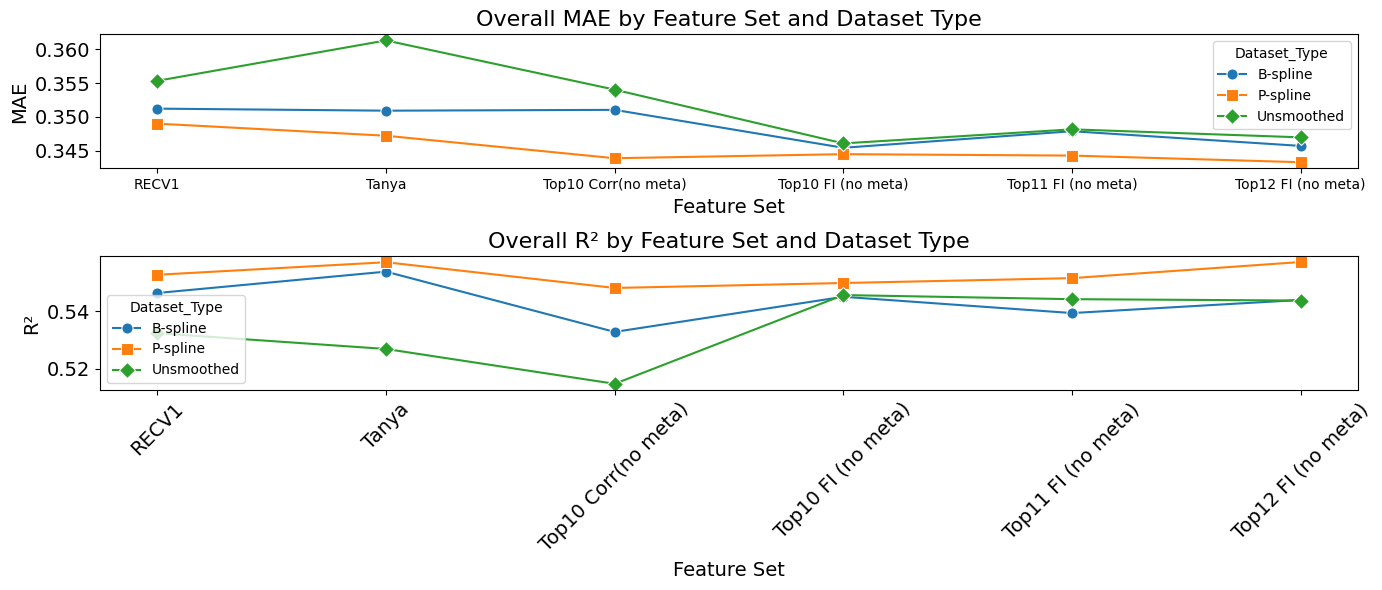

In [152]:
# Set up the plot
plt.figure(figsize=(14, 6))

markers = {'B-spline': 'o', 'P-spline': 's', 'Unsmoothed': 'D'}

# Plot MAE for 'Overall'
plt.subplot(2, 1, 1)
sns.lineplot(x='Simplified_Feature_Set', y='MAE', hue='Dataset_Type', style='Dataset_Type',
             markers=markers, dashes=False, data=overall_df, markersize = 8)
plt.title('Overall MAE by Feature Set and Dataset Type', fontsize = 16)
plt.xlabel('Feature Set', size = 14)
plt.yticks(size = 14)
plt.ylabel('MAE', size = 14)

# Plot R² for 'Overall'
plt.subplot(2, 1, 2)
sns.lineplot(x='Simplified_Feature_Set', y='R²', hue='Dataset_Type', style='Dataset_Type',
             markers=markers, dashes=False, data=overall_df, markersize =8)
plt.title('Overall R² by Feature Set and Dataset Type', fontsize = 16)
plt.yticks(size = 14)
plt.xlabel('Feature Set', size = 14)
plt.xticks(size = 14, rotation = 45)
plt.ylabel('R²', size = 14)

plt.tight_layout()
plt.show()

In [153]:
# Separate the data for unsmoothed, B-spline, and P-spline
unsmoothed_df = overall_df[overall_df['Dataset_Type'] == 'Unsmoothed']
bspline_df = overall_df[overall_df['Dataset_Type'] == 'B-spline']
pspline_df = overall_df[overall_df['Dataset_Type'] == 'P-spline']

# Paired t-test between unsmoothed and B-spline
t_stat_mae_bs, p_value_mae_bs = ttest_rel(unsmoothed_df['MAE'], bspline_df['MAE'])
t_stat_r2_bs, p_value_r2_bs = ttest_rel(unsmoothed_df['R²'], bspline_df['R²'])

# Paired t-test between unsmoothed and P-spline
t_stat_mae_ps, p_value_mae_ps = ttest_rel(unsmoothed_df['MAE'], pspline_df['MAE'])
t_stat_r2_ps, p_value_r2_ps = ttest_rel(unsmoothed_df['R²'], pspline_df['R²'])

# Display the results
print("Paired t-test for MAE (Unsmoothed vs B-spline): t-statistic = {}, p-value = {}".format(t_stat_mae_bs, p_value_mae_bs))
print("Paired t-test for R² (Unsmoothed vs B-spline): t-statistic = {}, p-value = {}".format(t_stat_r2_bs, p_value_r2_bs))

print("Paired t-test for MAE (Unsmoothed vs P-spline): t-statistic = {}, p-value = {}".format(t_stat_mae_ps, p_value_mae_ps))
print("Paired t-test for R² (Unsmoothed vs P-spline): t-statistic = {}, p-value = {}".format(t_stat_r2_ps, p_value_r2_ps))

Paired t-test for MAE (Unsmoothed vs B-spline): t-statistic = 2.1276765258960504, p-value = 0.08665873832860167
Paired t-test for R² (Unsmoothed vs B-spline): t-statistic = -1.7472630662708106, p-value = 0.141018840513952
Paired t-test for MAE (Unsmoothed vs P-spline): t-statistic = 3.460114765130943, p-value = 0.018040084389968042
Paired t-test for R² (Unsmoothed vs P-spline): t-statistic = -3.7138774824066236, p-value = 0.01379933592654508


### b-spline vs pspline

In [137]:
feature_sets_bvp = [
    # Smoothed Feature Sets with meta data (B-spline and P-spline)
    {'name': 'Set_1', 'features': f1_with_meta, 'compatible_datasets':['B-spline', 'P-spline']},
    {'name': 'Set_2', 'features': f2_with_meta, 'compatible_datasets':['B-spline', 'P-spline']},
    {'name': 'Set_5', 'features': f5_with_meta, 'compatible_datasets':['B-spline', 'P-spline']},
    {'name': 'Set_7', 'features': f7_with_meta, 'compatible_datasets':['B-spline', 'P-spline']},
    {'name': 'Set_10', 'features': f10_with_meta, 'compatible_datasets':['B-spline', 'P-spline']},
    {'name': 'Set_11', 'features': f11_with_meta, 'compatible_datasets':['B-spline', 'P-spline']},
    {'name': 'Set_Top10', 'features': features_top10, 'compatible_datasets':['B-spline', 'P-spline']},
    {'name': 'Set_Top10_FI', 'features': features_top10_fi, 'compatible_datasets':['B-spline', 'P-spline']}
]

all_results_bvp = pd.DataFrame()

for feature_set in feature_sets_bvp:
    for dataset_type, input_dir in datasets.items():
        # Check if the feature set is compatible with the dataset
        if dataset_type not in feature_set['compatible_datasets']:
            continue
        
        # Construct feature set name based on dataset type
        feature_set_name = f"{feature_set['name']}_{dataset_type}"
        
        # Debugging print statements
        print(f"Processing feature set: {feature_set['name']} with dataset: {dataset_type}")
        
        # Evaluate model
        metrics_df = evaluate_model(input_dir, feature_set_name, feature_set['features'])
        metrics_df['Dataset_Type'] = dataset_type  # Track dataset used
        
        # Store results
        all_results_bvp = pd.concat([all_results_bvp, metrics_df], ignore_index=True)

# Save all results to a single CSV file
all_results_bvp.to_csv('performance_metrics_bvp_features.csv', index=False)
print("All performance metrics saved to 'performance_metrics_bvp_features.csv'")

Processing feature set: Set_1 with dataset: B-spline
Fold 1: MSE = 0.20431532793583213, MAE = 0.3509376331417043, R² = 0.2799111028825111
Fold 2: MSE = 0.16975663893844212, MAE = 0.27918462380583214, R² = 0.3480570133600792
Fold 3: MSE = 0.23960748286253816, MAE = 0.36889274473890415, R² = 0.4654878788206971
Fold 4: MSE = 0.22357729481918842, MAE = 0.3747911033035358, R² = 0.4768001157024385
Fold 5: MSE = 0.2414707782915744, MAE = 0.369081832121446, R² = 0.4761860303954205

Overall Performance across all folds:
Overall MSE: 0.21458726952063262
Overall MAE: 0.3472616625215423
Overall R²: 0.5513865060595531
Processing feature set: Set_1 with dataset: P-spline
Fold 1: MSE = 0.21247281080499364, MAE = 0.35767726754138207, R² = 0.2511608720415134
Fold 2: MSE = 0.15782868036217915, MAE = 0.2722132497853665, R² = 0.39386581935055376
Fold 3: MSE = 0.23149994824889755, MAE = 0.36788310800322455, R² = 0.4835740231768725
Fold 4: MSE = 0.21510858247416273, MAE = 0.36629311745246346, R² = 0.4966180

In [138]:
overall_bvp = all_results_bvp[all_results_bvp['Fold'] == 'Overall']

,Feature_Set,Fold,MSE,MAE,R²,Dataset_Type
5,Set_1_B-spline,Overall,0.214587,0.347262,0.551387,B-spline
11,Set_1_P-spline,Overall,0.208254,0.343346,0.564628,P-spline
17,Set_2_B-spline,Overall,0.215455,0.348071,0.549573,B-spline
23,Set_2_P-spline,Overall,0.206858,0.342888,0.567545,P-spline
29,Set_5_B-spline,Overall,0.216901,0.347121,0.546549,B-spline
35,Set_5_P-spline,Overall,0.207850,0.340916,0.565472,P-spline
41,Set_7_B-spline,Overall,0.217287,0.347243,0.545743,B-spline
47,Set_7_P-spline,Overall,0.210635,0.343706,0.559649,P-spline
53,Set_10_B-spline,Overall,0.213295,0.345929,0.554089,B-spline
59,Set_10_P-spline,Overall,0.210110,0.344932,0.560748,P-spline


In [143]:
overall_bvp['Simplified_Feature_Set'] = overall_bvp['Feature_Set'].replace({
    'Set_1_B-spline': 'Set 1',
    'Set_1_P-spline': 'Set 1',
    'Set_2_B-spline': 'Set 2',
    'Set_2_P-spline': 'Set 2',
    'Set_5_B-spline': 'Set 5',
    'Set_5_P-spline': 'Set 5',
    'Set_7_B-spline': 'Set 7',
    'Set_7_P-spline': 'Set 7',
    'Set_10_B-spline': 'Set 10',
    'Set_10_P-spline': 'Set 10',
    'Set_11_B-spline': 'Set 11',
    'Set_11_P-spline': 'Set 11',
    'Set_Top10_B-spline': 'Top10',
    'Set_Top10_P-spline': 'Top10',
    'Set_Top10_FI_P-spline': 'Top10 FI',
    'Set_Top10_FI_B-spline': 'Top10 FI',
})

/var/folders/rt/3hw_n0v124vg8h2q8kwnx3180000gn/T/ipykernel_91822/3081226661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_bvp['Simplified_Feature_Set'] = overall_bvp['Feature_Set'].replace({


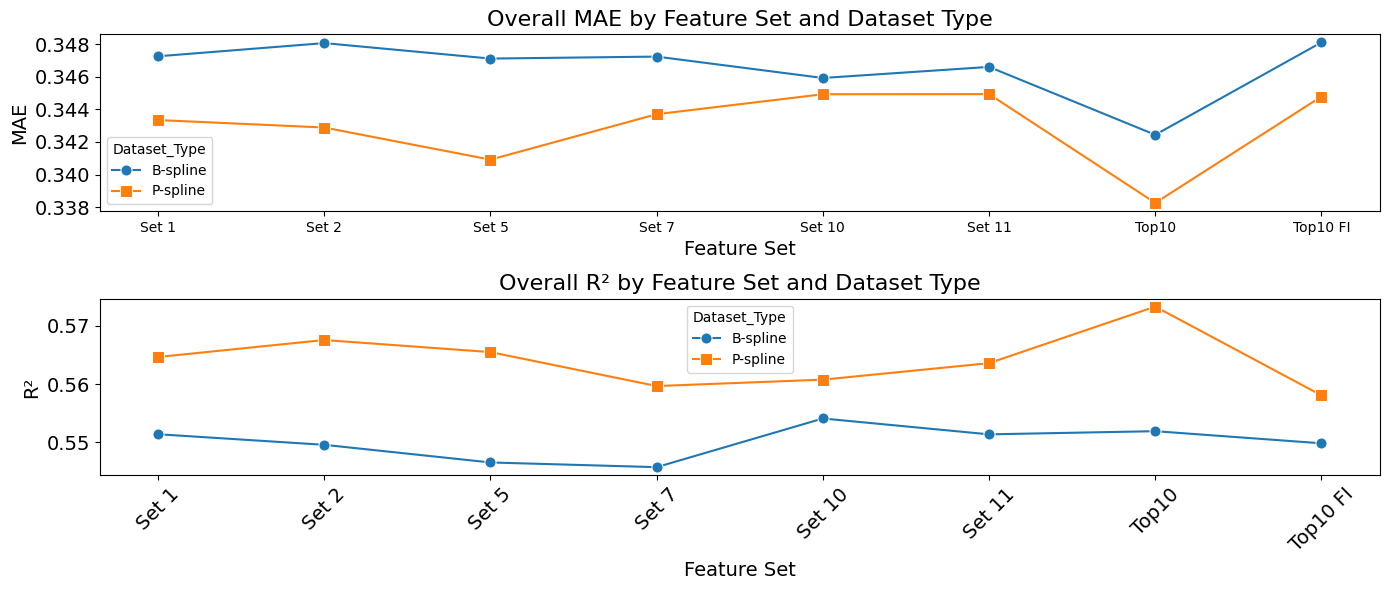

In [144]:
# Set up the plot
plt.figure(figsize=(14, 6))

markers = {'B-spline': 'o', 'P-spline': 's', 'Unsmoothed': 'D'}

# Plot MAE for 'Overall'
plt.subplot(2, 1, 1)
sns.lineplot(x='Simplified_Feature_Set', y='MAE', hue='Dataset_Type', style='Dataset_Type',
             markers=markers, dashes=False, data=overall_bvp, markersize = 8)
plt.title('Overall MAE by Feature Set and Dataset Type', fontsize = 16)
plt.xlabel('Feature Set', size = 14)
plt.yticks(size = 14)
plt.ylabel('MAE', size = 14)

# Plot R² for 'Overall'
plt.subplot(2, 1, 2)
sns.lineplot(x='Simplified_Feature_Set', y='R²', hue='Dataset_Type', style='Dataset_Type',
             markers=markers, dashes=False, data=overall_bvp, markersize =8)
plt.title('Overall R² by Feature Set and Dataset Type', fontsize = 16)
plt.yticks(size = 14)
plt.xlabel('Feature Set', size = 14)
plt.xticks(size = 14, rotation = 45)
plt.ylabel('R²', size = 14)

plt.tight_layout()
plt.show()

## statistical significance 

In [146]:
from scipy.stats import ttest_rel

# Separate the results by spline type
b_spline_mae = all_results_bvp[all_results_bvp['Dataset_Type'] == 'B-spline']['MAE']
p_spline_mae = all_results_bvp[all_results_bvp['Dataset_Type'] == 'P-spline']['MAE']

b_spline_r2 = all_results_bvp[all_results_bvp['Dataset_Type'] == 'B-spline']['R²']
p_spline_r2 = all_results_bvp[all_results_bvp['Dataset_Type'] == 'P-spline']['R²']

# Perform paired t-tests
t_stat_mae, p_value_mae = ttest_rel(b_spline_mae, p_spline_mae)
t_stat_r2, p_value_r2 = ttest_rel(b_spline_r2, p_spline_r2)

print(f"Paired t-test for MAE: t-statistic = {t_stat_mae}, p-value = {p_value_mae}")
print(f"Paired t-test for R²: t-statistic = {t_stat_r2}, p-value = {p_value_r2}")

Paired t-test for MAE: t-statistic = 3.0256888270569866, p-value = 0.0040147245541928
Paired t-test for R²: t-statistic = -4.266258032584962, p-value = 9.538004308614694e-05


# Impact of meta features 

In [172]:
f1_with_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig',
                        'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                        'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                        'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                        'gp41_maf12c', 'gp41_maf3c',
                        'lrtt_coeff_1'] #meta features
f1_no_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig',
                        'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                        'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                        'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                        'gp41_maf12c', 'gp41_maf3c'] 

f2_with_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig',
                         'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                         'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                         'gp41_maf12c', 'gp41_maf3c',
                         'lrtt_coeff_1', 'lrtt_coeff_3'] #meta features
f2_no_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig',
                         'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                         'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                         'gp41_maf12c', 'gp41_maf3c']

f5_with_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c',
                         'gag_lrtt', 'gag_maf3c', 
                         'pol_lrtt', 
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_ambig', 
                         'gp41_maf3c', 
                         'lrtt_coeff_1', 'lrtt_coeff_3'] #meta features
f5_no_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c',
                            'gag_lrtt', 'gag_maf3c', 
                            'pol_lrtt', 
                            'gp120_lrtt', 'gp120_maf12c', 'gp120_ambig', 
                            'gp41_maf3c'] 

f7_with_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c',
                         'gag_lrtt', 'gag_maf3c', 
                         'pol_lrtt',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_ambig', 
                         'gp41_maf3c', 
                         'lrtt_coeff_1', 'lrtt_coeff_3', 'gp120_maf3c'] #meta features
f7_no_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c',
                         'gag_lrtt', 'gag_maf3c', 
                         'pol_lrtt',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_ambig', 'gp120_maf3c',
                         'gp41_maf3c']

f10_with_meta= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
                         'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                         'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
                         'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig',
                         'lrtt_coeff_1'] #meta feature
f10_no_meta= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
                         'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                         'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
                         'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig']

f11_with_meta= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
                         'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                         'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
                         'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig',
                         'lrtt_coeff_1', 'lrtt_coeff_3']
f11_no_meta= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
                         'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                         'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                         'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
                         'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig']

f12_with_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 
                                'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 
                                'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 
                                'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                                'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 
                                'lrtt_coeff_1', 'lrtt_coeff_3', 'lrtt_coeff_11']  
f12_no_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 
                                'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 
                                'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 
                                'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                                'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips']

f13_with_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 
                                'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 
                                'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 
                                'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                                'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 
                                'lrtt_coeff_1', 'lrtt_coeff_3', 'lrtt_coeff_11'] #meta features
f13_no_meta = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 
                                'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 
                                'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 
                                'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                                'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips'] #meta features


features_top10 = ['genome_lrtt', 'genome_ambig',
                  'gag_lrtt', 'gag_maf3c', 'gag_ambig',
                  'pol_maf3c', 'pol_ambig',
                  'gp120_lrtt',
                  'lrtt_coeff_1', 'lrtt_coeff_4']


top10_fi_with_meta = ['genome_lrtt',
                     'gag_lrtt', 'gag_maf3c',
                     'pol_maf3c', 'pol_ambig',
                     'gp120_lrtt', 'gp120_maf3c',
                     'lrtt_coeff_1',
                     'maf3c_coeff_0', 'maf3c_coeff_2']
top10_fi_no_meta = ['genome_lrtt',
                     'gag_lrtt', 'gag_maf3c',
                     'pol_maf3c', 'pol_ambig',
                     'gp120_lrtt', 'gp120_maf3c']

top11_fi_with_meta = ['genome_lrtt',
                     'gag_lrtt', 'gag_maf3c',
                     'pol_maf3c', 'pol_ambig',
                     'gp120_lrtt', 'gp120_maf3c',
                     'lrtt_coeff_1',
                     'maf3c_coeff_0', 'maf3c_coeff_2']
top11_fi_no_meta= ['genome_lrtt',
                     'gag_lrtt', 'gag_maf3c',
                     'pol_maf3c', 'pol_ambig',
                     'gp120_lrtt', 'gp120_maf3c']

features_top10_corr = ['genome_lrtt', 'genome_maf3c',
                        'gag_lrtt', 
                        'pol_lrtt',
                        'gp120_lrtt', 'gp120_maf12c',
                        'gp41_maf3c',
                        'lrtt_coeff_1', 'lrtt_coeff_3', 'lrtt_coeff_11']

features_top11_corr = [
    'genome_lrtt',    # R² = 0.51
    'gag_lrtt',       # R² = 0.51
    'pol_lrtt',       # R² = 0.44
    'lrtt_coeff_1',   # R² = 0.41
    'gp120_lrtt',     # R² = 0.31
    'lrtt_coeff_3',   # R² = 0.28
    'lrtt_coeff_11',  # R^2 = 0.26
    'gp120_maf12c',   # R² = 0.25
    'genome_maf3c', #R^2 = 0.24
    'gp41_maf3c',    # R² = 0.24
    'gag_maf3c' #R^2 = 0.23
]
features_top12_corr = [
    'genome_lrtt',    # R² = 0.51
    'gag_lrtt',       # R² = 0.51
    'pol_lrtt',       # R² = 0.44
    'lrtt_coeff_1',   # R² = 0.41
    'gp120_lrtt',     # R² = 0.31
    'lrtt_coeff_3',   # R² = 0.28
    'lrtt_coeff_11',   # R^2 = 0.26
    'gp120_maf12c',   # R² = 0.25
    'genome_maf3c', #R^2 = 0.24
    'gp41_maf3c',    # R² = 0.24
    'gag_maf3c',    #R^2 = 0.23
    'lrtt_coeff_4', #R^2 = 0.23
]


In [173]:
feature_sets_meta = [
    # Smoothed Feature Sets with meta data (B-spline and P-spline)
    {'name': 'Set_1', 'Meta_Features':'no', 'features': f1_no_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Set_1', 'Meta_Features':'yes', 'features': f1_with_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Set_2', 'Meta_Features':'no', 'features': f2_no_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Set_2','Meta_Features':'yes', 'features': f2_with_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Set_5', 'Meta_Features':'no', 'features': f5_no_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Set_5', 'Meta_Features':'yes', 'features': f5_with_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Set_7', 'Meta_Features':'no', 'features': f7_no_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Set_7', 'Meta_Features':'yes', 'features': f7_with_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Top10_fi', 'Meta_Features':'no', 'features': top10_fi_no_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Top10_fi', 'Meta_Features':'yes', 'features': top10_fi_with_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Top11_fi', 'Meta_Features':'no', 'features': top11_fi_no_meta, 'compatible_datasets':['P-spline']},
    {'name': 'Top11_fi', 'Meta_Features':'yes', 'features': top11_fi_with_meta, 'compatible_datasets':['P-spline']},
]

all_results_meta = pd.DataFrame()

for feature_set in feature_sets_meta:
    for dataset_type, input_dir in datasets.items():
        # Check if the feature set is compatible with the dataset
        if dataset_type not in feature_set['compatible_datasets']:
            continue
        
        # Construct feature set name based on dataset type
        feature_set_name = f"{feature_set['name']}_{dataset_type}"
        
        # Debugging print statements
        print(f"Processing feature set: {feature_set['name']} with dataset: {dataset_type}")
        
        # Evaluate model
        metrics_df = evaluate_model(input_dir, feature_set_name, feature_set['features'])
        metrics_df['Dataset_Type'] = dataset_type  # Track dataset used
        metrics_df['Meta_Features'] = feature_set['Meta_Features']
        
        # Store results
        all_results_meta = pd.concat([all_results_meta, metrics_df], ignore_index=True)

# Save all results to a single CSV file
all_results_meta.to_csv('performance_metrics_meta_features.csv', index=False)
print("All performance metrics saved to 'performance_metrics_meta_features.csv'")

Processing feature set: Set_1 with dataset: P-spline
Fold 1: MSE = 0.19859840848711266, MAE = 0.3426833016941698, R² = 0.300059812537965
Fold 2: MSE = 0.16072167700601217, MAE = 0.2699109981140192, R² = 0.3827553915987195
Fold 3: MSE = 0.24197269953786757, MAE = 0.37741395072350437, R² = 0.46021159542973034
Fold 4: MSE = 0.22912997673720767, MAE = 0.37544615916542257, R² = 0.4638061194229939
Fold 5: MSE = 0.2362758858736194, MAE = 0.36213750298655534, R² = 0.4874551257218619

Overall Performance across all folds:
Overall MSE: 0.21204090407567677
Overall MAE: 0.344024326641688
Overall R²: 0.5567099061925747
Processing feature set: Set_1 with dataset: P-spline
Fold 1: MSE = 0.21247281080499364, MAE = 0.35767726754138207, R² = 0.2511608720415134
Fold 2: MSE = 0.15782868036217915, MAE = 0.2722132497853665, R² = 0.39386581935055376
Fold 3: MSE = 0.23149994824889755, MAE = 0.36788310800322455, R² = 0.4835740231768725
Fold 4: MSE = 0.21510858247416273, MAE = 0.36629311745246346, R² = 0.496618

In [174]:
overall_meta = all_results_meta[all_results_meta['Fold'] == 'Overall']

In [175]:
for feature_set_name in ['Set_1', 'Set_2', 'Set_5', 'Set_7', 'Top10_fi']:
    # Filter data for the current feature set
    no_meta = all_results_meta[(all_results_meta['Feature_Set'] == f'{feature_set_name}_P-spline') & (all_results_meta['Meta_Features'] == 'no')]
    meta = all_results_meta[(all_results_meta['Feature_Set'] == f'{feature_set_name}_P-spline') & (all_results_meta['Meta_Features'] == 'yes')]

    # Perform paired t-tests
    mae_t_stat, mae_p_value = ttest_rel(no_meta['MAE'], meta['MAE'])
    r2_t_stat, r2_p_value = ttest_rel(no_meta['R²'], meta['R²'])

    # Report results
    print(f"Paired t-test for MAE ({feature_set_name} P-spline, No Meta vs Meta): t-statistic = {mae_t_stat}, p-value = {mae_p_value}")
    print(f"Paired t-test for R² ({feature_set_name} P-spline, No Meta vs Meta): t-statistic = {r2_t_stat}, p-value = {r2_p_value}")
    print("\n")

Paired t-test for MAE (Set_1 P-spline, No Meta vs Meta): t-statistic = 0.24712460480866494, p-value = 0.8146382028715097
Paired t-test for R² (Set_1 P-spline, No Meta vs Meta): t-statistic = -0.581394300342824, p-value = 0.5861979396072814


Paired t-test for MAE (Set_2 P-spline, No Meta vs Meta): t-statistic = 0.3159540309696241, p-value = 0.7648006233051611
Paired t-test for R² (Set_2 P-spline, No Meta vs Meta): t-statistic = -0.7800430787756815, p-value = 0.4706603879866646


Paired t-test for MAE (Set_5 P-spline, No Meta vs Meta): t-statistic = 1.729114881701838, p-value = 0.14435603565574698
Paired t-test for R² (Set_5 P-spline, No Meta vs Meta): t-statistic = -2.1863574922322107, p-value = 0.08046529330603794


Paired t-test for MAE (Set_7 P-spline, No Meta vs Meta): t-statistic = 0.7381506269026701, p-value = 0.493589231239546
Paired t-test for R² (Set_7 P-spline, No Meta vs Meta): t-statistic = -1.318158435266025, p-value = 0.24460588889470536


Paired t-test for MAE (Top10_fi 

## Impact of amibuity


In [181]:
features_top10_no_ambig = ['genome_lrtt', 
                            'gag_lrtt', 'gag_maf3c', 
                            'pol_maf3c', 
                            'gp120_lrtt',
                            'lrtt_coeff_1', 'lrtt_coeff_4']
f1_no_ambig= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 
              'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 
              'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips',
              'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
              'gp41_maf12c', 'gp41_maf3c',
              'lrtt_coeff_1']

In [205]:
base_feature_sets = {
    'Top10': features_top10_no_ambig,
    'Set_1': f1_no_ambig,
    'RFECV': features_smoothed_no_meta
}

# Correlated ambiguity features
most_correlated_ambiguity_feature = 'gp120_ambig'
second_most_correlated_ambiguity_feature = 'genome_ambig'

# Create variants with ambiguity features
feature_sets_with_ambiguity = {}

for set_name, features in base_feature_sets.items():
    feature_sets_with_ambiguity[f'{set_name}_base'] = features
    feature_sets_with_ambiguity[f'{set_name}_1_ambiguity'] = features + [most_correlated_ambiguity_feature]
    feature_sets_with_ambiguity[f'{set_name}_2_ambiguity'] = features + [most_correlated_ambiguity_feature, second_most_correlated_ambiguity_feature]

In [206]:
all_results_ambiguity_test = pd.DataFrame()
feature_sets_with_ambiguity = []

for set_name, features in base_feature_sets.items():
    feature_sets_with_ambiguity.append({
        'name': f'{set_name}_base',
        'features': features,
        'compatible_datasets': ['P-spline']
    })
    feature_sets_with_ambiguity.append({
        'name': f'{set_name}_1_ambiguity',
        'features': features + [most_correlated_ambiguity_feature],
        'compatible_datasets': ['P-spline']
    })
    feature_sets_with_ambiguity.append({
        'name': f'{set_name}_2_ambiguity',
        'features': features + [most_correlated_ambiguity_feature, second_most_correlated_ambiguity_feature],
        'compatible_datasets': ['P-spline']
    })

In [210]:
all_results_ambiguity = pd.DataFrame()

for feature_set in feature_sets_with_ambiguity:
    for dataset_type, input_dir in datasets.items():
        # Check if the feature set is compatible with the dataset
        if dataset_type not in feature_set['compatible_datasets']:
            continue
        
        # Construct feature set name based on dataset type
        feature_set_name = f"{feature_set['name']}"
        
        # Debugging print statements
        print(f"Processing feature set: {feature_set['name']}")
        
        # Evaluate model
        metrics_df = evaluate_model(input_dir, feature_set_name, feature_set['features'])
        metrics_df['Dataset_Type'] = dataset_type  # Track dataset used
        
        # Store results
        all_results_ambiguity = pd.concat([all_results_ambiguity, metrics_df], ignore_index=True)


Processing feature set: Top10_base with dataset: P-spline
Fold 1: MSE = 0.20151339259731402, MAE = 0.348360800986535, R² = 0.2897862431771331
Fold 2: MSE = 0.1587353670478892, MAE = 0.2805908220375882, R² = 0.39038372857917125
Fold 3: MSE = 0.22898586403787696, MAE = 0.3685179410002825, R² = 0.4891823976249565
Fold 4: MSE = 0.2236109288305551, MAE = 0.37536406356448754, R² = 0.4767214077510352
Fold 5: MSE = 0.23112058522062479, MAE = 0.36910694185387555, R² = 0.49863833604095664

Overall Performance across all folds:
Overall MSE: 0.20766059507818482
Overall MAE: 0.34707019881815376
Overall R²: 0.5658673260539364
Processing feature set: Top10_1_ambiguity with dataset: P-spline
Fold 1: MSE = 0.20083443336900972, MAE = 0.3422756184811644, R² = 0.29217916693296075
Fold 2: MSE = 0.1519677836209316, MAE = 0.27123331570553044, R² = 0.41637433830905335
Fold 3: MSE = 0.2255555383133635, MAE = 0.36812041441020493, R² = 0.49683470738356916
Fold 4: MSE = 0.23021629454962722, MAE = 0.37551157532431

In [211]:
all_results_ambiguity['Ambiguity_Features'] = all_results_ambiguity['Feature_Set'].apply(lambda x: 
                                                                              'Base' if 'base' in x else 
                                                                              'Base + 1 Ambiguity' if '1_ambiguity' in x else 
                                                                              'Base + 2 Ambiguity')
overall_ambiguity = all_results_ambiguity[all_results_ambiguity['Fold'] == 'Overall']

In [215]:
overall_ambiguity['Simplified_Feature_Set'] = overall_ambiguity['Feature_Set'].replace({
    'Set_1_base': 'Set 1',
    'Set_1_1_ambiguity': 'Set 1',
    'Set_1_2_ambiguity': 'Set 1',
    'RFECV_base': 'RFECV',
    'RFECV_1_ambiguity': 'RFECV',
    'RFECV_2_ambiguity': 'RFECV',
    'Top10_base': 'Top10',
    'Top10_1_ambiguity': 'Top10',
    'Top10_2_ambiguity': 'Top10'
})

/var/folders/rt/3hw_n0v124vg8h2q8kwnx3180000gn/T/ipykernel_91822/3677563026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_ambiguity['Simplified_Feature_Set'] = overall_ambiguity['Feature_Set'].replace({


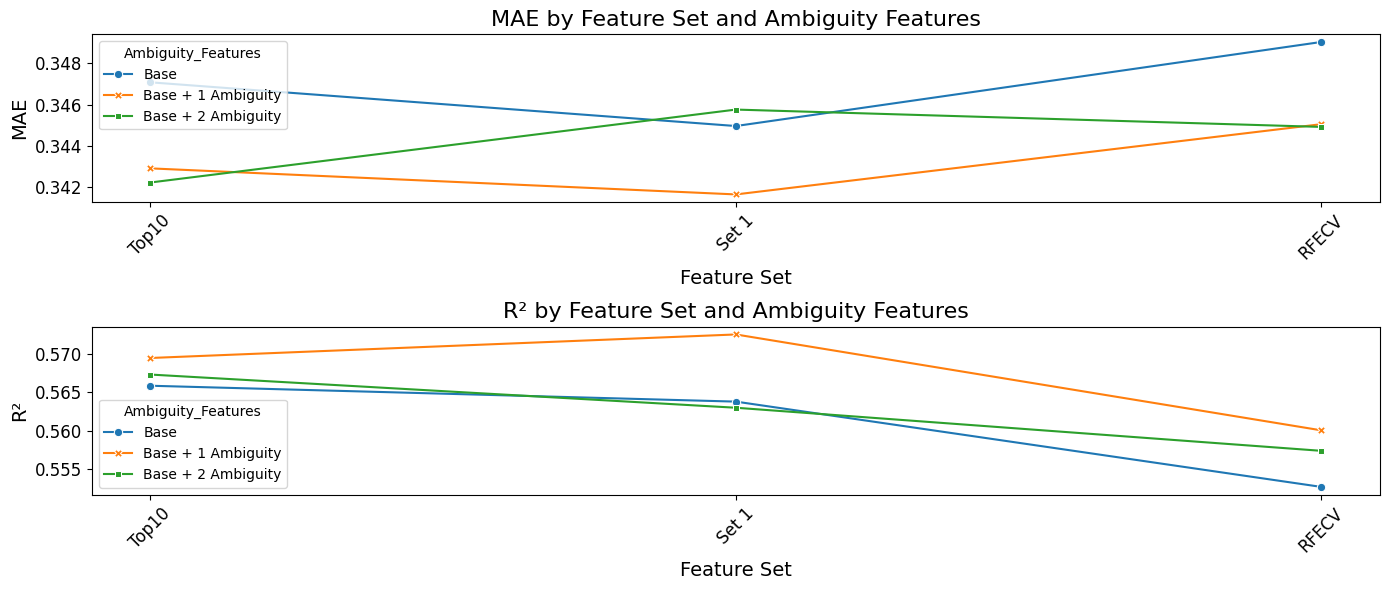

In [217]:
# Plot MAE by Feature Set and Ambiguity Level
plt.figure(figsize=(14, 6))

# Plot MAE
plt.subplot(2, 1, 1)
sns.lineplot(x='Simplified_Feature_Set', y='MAE', hue='Ambiguity_Features', style='Ambiguity_Features',
             data=overall_ambiguity, markers=True, dashes=False)
plt.title('MAE by Feature Set and Ambiguity Features', fontsize=16)
plt.xlabel('Feature Set', size=14)
plt.ylabel('MAE', size=14)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

# Plot R²
plt.subplot(2, 1, 2)
sns.lineplot(x='Simplified_Feature_Set', y='R²', hue='Ambiguity_Features', style='Ambiguity_Features',
             data=overall_ambiguity, markers=True, dashes=False)
plt.title('R² by Feature Set and Ambiguity Features', fontsize=16)
plt.xlabel('Feature Set', size=14)
plt.ylabel('R²', size=14)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

plt.tight_layout()
plt.show()

In [218]:
# Filter data by Ambiguity Levels
base_mae = all_results_ambiguity[all_results_ambiguity['Ambiguity_Features'] == 'Base']['MAE']
ambiguity_1_mae = all_results_ambiguity[all_results_ambiguity['Ambiguity_Features'] == 'Base + 1 Ambiguity']['MAE']
ambiguity_2_mae = all_results_ambiguity[all_results_ambiguity['Ambiguity_Features'] == 'Base + 2 Ambiguity']['MAE']

base_r2 = all_results_ambiguity[all_results_ambiguity['Ambiguity_Features'] == 'Base']['R²']
ambiguity_1_r2 = all_results_ambiguity[all_results_ambiguity['Ambiguity_Features'] == 'Base + 1 Ambiguity']['R²']
ambiguity_2_r2 = all_results_ambiguity[all_results_ambiguity['Ambiguity_Features'] == 'Base + 2 Ambiguity']['R²']

# Perform paired t-tests
t_stat_mae_1, p_value_mae_1 = ttest_rel(base_mae, ambiguity_1_mae)
t_stat_r2_1, p_value_r2_1 = ttest_rel(base_r2, ambiguity_1_r2)

t_stat_mae_2, p_value_mae_2 = ttest_rel(base_mae, ambiguity_2_mae)
t_stat_r2_2, p_value_r2_2 = ttest_rel(base_r2, ambiguity_2_r2)

# Print the results
print(f"Paired t-test for MAE (Base vs 1 Ambiguity): t-statistic = {t_stat_mae_1}, p-value = {p_value_mae_1}")
print(f"Paired t-test for R² (Base vs 1 Ambiguity): t-statistic = {t_stat_r2_1}, p-value = {p_value_r2_1}")

print(f"Paired t-test for MAE (Base vs 2 Ambiguity): t-statistic = {t_stat_mae_2}, p-value = {p_value_mae_2}")
print(f"Paired t-test for R² (Base vs 2 Ambiguity): t-statistic = {t_stat_r2_2}, p-value = {p_value_r2_2}")


Paired t-test for MAE (Base vs 1 Ambiguity): t-statistic = 4.611803242809321, p-value = 0.0002487267887339755
Paired t-test for R² (Base vs 1 Ambiguity): t-statistic = -2.911494052812688, p-value = 0.009722739480426793
Paired t-test for MAE (Base vs 2 Ambiguity): t-statistic = 1.6732684710660677, p-value = 0.11257418463680192
Paired t-test for R² (Base vs 2 Ambiguity): t-statistic = -1.2815102930489264, p-value = 0.21721882504120774
